In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df= pd.read_csv("E:/Anonymize_Loan_Default_data.csv/Anonymize_Loan_Default_data.csv", encoding="ISO-8859-1")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [38]:
x = df["member_id"].values.reshape(-1, 1)
y = df["loan_amnt"].values 
x = np.c_[np.ones(x.shape[0]), x]
s = int(0.8 * len(X))
x_train, x_test = x[:s], x[s:]
y_train, y_test = y[:s], y[s:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 30784
Testing set size: 7696


In [44]:
def cost(x,y,w,b):
    y1=x.dot(w)+b
    sum=(np.sum(np.square(y1-y))+1000*np.sum(np.square(w)))/(2*m)
    return sum

In [40]:
#gradient descent 
#w= np.zeros[np.shape(x.shape[0]), x]
w=np.zeros(np.shape(x_train)[1])
#w = np.random.randn(f) * 0.01
b=0
print(w)
print(b)
a=0.01
it=[]
costs=[]
ct=cost(x_train,y_train,w,b)
costs.append(ct)
iterations=10
i=0
it.append(i)
while i<iterations:
    wd=w_derive(x_train,y_train,w,b)
    bd=b_derive(x_train,y_train,w,b)
    s1=1-a*(1000/m)
    s2=a/m
    w=w*s1-s2*wd
    b=b*s1-s2*bd
    ct=cost(x_train,y_train,w,b)
    print(w)
    print(b)
    costs.append(ct)
    i=i+1
    it.append(i)
c=np.array(costs)
print(c)
its=np.array(it)

[0. 0.]
0


NameError: name 'm' is not defined

In [41]:
#w update
def w_derive(x,y,w,b):
    predictions = np.dot(x, w) + b  
    errors = predictions - y 
    dw = np.dot(x.T, errors) / m
    return dw

In [42]:
# b derive
def b_derive(x,y,w,b):
    prediction=np.dot(x,w)+b
    db=np.sum(prediction-y)/m
    return db

Training set size: 30784
Testing set size: 7696


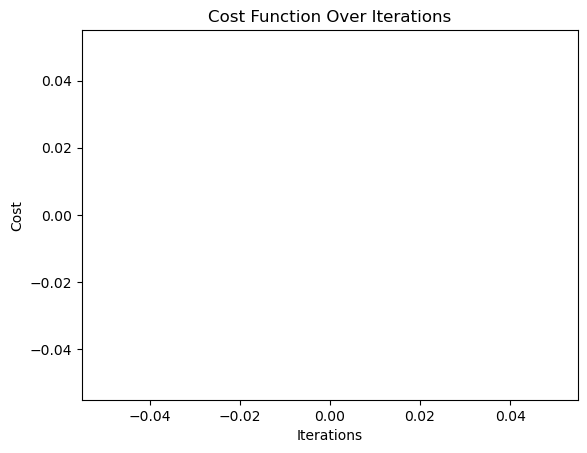

In [46]:

# Extract features and target
x = df["member_id"].values.reshape(-1, 1)  # Feature
y = df["loan_amnt"].values  # Target

# Add bias term (column of ones)
x = np.c_[np.ones(x.shape[0]), x]  

# Train-test split (80-20)
s = int(0.8 * len(x))  
x_train, x_test = x[:s], x[s:]  
y_train, y_test = y[:s], y[s:]  

# Print dataset sizes
print("Training set size:", len(x_train))  
print("Testing set size:", len(x_test))  

# Define cost function with L2 regularization
def cost(x, y, w, b, lambda_reg=1000):
    m = len(y)
    y_pred = np.dot(x, w) + b
    cost_value = (np.sum((y_pred - y) ** 2) + lambda_reg * np.sum(w ** 2)) / (2 * m)
    return cost_value

# Compute gradients
def w_derive(x, y, w, b):
    m = len(y)
    predictions = np.dot(x, w) + b  
    errors = predictions - y 
    dw = np.dot(x.T, errors) / m
    return dw

def b_derive(x, y, w, b):
    m = len(y)
    predictions = np.dot(x, w) + b
    db = np.sum(predictions - y) / m
    return db

# Initialize parameters
w = np.zeros(x.shape[1])  # Shape should match number of features
b = 0
alpha = 0.01  # Learning rate
iterations = 10

costs = []
it = []

# Gradient Descent Loop
for i in range(iterations):
    wd = w_derive(x_train, y_train, w, b)
    bd = b_derive(x_train, y_train, w, b)
    
    # Update weights and bias with L2 regularization
    w = w * (1 - alpha * 1000 / len(y_train)) - (alpha / len(y_train)) * wd
    b = b * (1 - alpha * 1000 / len(y_train)) - (alpha / len(y_train)) * bd
    
    # Compute cost and store it
    ct = cost(x_train, y_train, w, b)
    costs.append(ct)
    it.append(i)

# Convert to NumPy arrays
costs = np.array(costs)
it = np.array(it)

# Plot the cost function
import matplotlib.pyplot as plt
plt.plot(it, costs, marker='o', linestyle='-')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()
